В цьому домашньому завданні ми побудуємо рішення задачі логістичної регресії і створимо ваш перший submission на змагання на Kaggle. Усі кроки були розглянуті в лекції та містяться в ноутбуці `Логістична регресія з ScikitLearn. Повна ML задача.ipynb`, але тепер ми їх адаптуємо до іншої задачі - все як в реальному житті, коли ви знайшли код у відкритих джерелах і адаптуєте на проєкті 😉

**Погнали! 🚀🚀🚀**

-----------



0. Завантажте дані `train.csv`, `test.csv`, `sample_submission.csv` зі змагання на Kaggle ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/7c080c5d8ec64364a93cf4e8f880b6a0). Для завантаження потрібно долучитись до змагання (натиснути кнопку "Join").

1. Зчитайте дані `train.csv` в pandas dataframe та розбийте їх на train і validation піднабори.

  * Є такий параметр в методі train_test_split як stratified. Можливо він буде Вам корисним при розбитті даних в цій задачі. Пропоную Вам почитати про нього в документації і спробувати скористатись.

In [65]:
import joblib
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

from modules.modules_2.topic_2_1.utils import analyze_dataframe

In [66]:
raw_df = pd.read_csv('bank-customer-churn-prediction-dlu/train.csv')

In [67]:
analyze_dataframe(raw_df)
raw_df.head(n=10)

Кількість числових колонок: 11
Кількість категоріальних колонок: 3
 - Бінарних: 1
 - Мультикатегоріальних: 2
Числові колонки: ['id', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
Категоріальні колонки: ['Surname', 'Geography', 'Gender']
Бінарні колонки: ['Gender']
Мультикатегоріальні колонки: ['Surname', 'Geography']


,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15779985.0,Nwankwo,678.0,France,Male,29.0,4.0,0.00,3.0,1.0,0.0,180626.36,0.0
1,1,15650086.0,Ch'in,687.0,France,Female,34.0,1.0,0.00,2.0,0.0,1.0,63736.17,0.0
2,2,15733602.0,Thompson,682.0,France,Female,52.0,6.0,0.00,3.0,0.0,0.0,179655.87,1.0
3,3,15645794.0,Macleod,753.0,Germany,Male,44.0,6.0,83347.25,2.0,1.0,0.0,161407.48,0.0
4,4,15633840.0,Hsia,544.0,Germany,Female,55.0,0.0,107747.57,1.0,1.0,0.0,176580.86,1.0
5,5,15781598.0,Hsieh,602.0,Spain,Male,33.0,1.0,120599.38,1.0,0.0,1.0,72950.14,0.0
6,6,15763093.0,Kao,739.0,France,Female,36.0,1.0,0.00,1.0,1.0,1.0,134626.30,0.0
7,7,15631715.0,Hargreaves,763.0,Spain,Male,28.0,2.0,0.00,2.0,1.0,0.0,19283.14,0.0
8,8,15632275.0,Hs?,620.0,Germany,Female,56.0,4.0,113743.37,1.0,1.0,0.0,121440.80,1.0
9,9,15577598.0,Chukwuemeka,525.0,France,Female,34.0,4.0,0.00,2.0,1.0,1.0,160670.58,0.0


In [68]:
raw_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   CustomerId       15000 non-null  float64
 2   Surname          15000 non-null  object 
 3   CreditScore      15000 non-null  float64
 4   Geography        15000 non-null  object 
 5   Gender           15000 non-null  object 
 6   Age              15000 non-null  float64
 7   Tenure           15000 non-null  float64
 8   Balance          15000 non-null  float64
 9   NumOfProducts    15000 non-null  float64
 10  HasCrCard        15000 non-null  float64
 11  IsActiveMember   15000 non-null  float64
 12  EstimatedSalary  15000 non-null  float64
 13  Exited           15000 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage: 1.6+ MB


In [69]:
# Analyze target column
raw_df['Exited'].value_counts(normalize=True)

Exited
0.0    0.796533
1.0    0.203467
Name: proportion, dtype: float64

In [70]:
from typing import Final

RANDOM_STATE: Final[int] = 42
# Split data into train and validation
_train_val_df, test_df = train_test_split(raw_df, test_size=0.2, random_state=RANDOM_STATE, stratify=raw_df['Exited'])
train_df, val_df = train_test_split(_train_val_df, test_size=0.25, random_state=RANDOM_STATE, stratify=_train_val_df['Exited'])

print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)
print('\n')

# Write percentage of data in each set
print(f"train_df: {train_df.shape[0] / raw_df.shape[0] * 100:.2f}%")
print(f"val_df: {val_df.shape[0] / raw_df.shape[0] * 100:.2f}%")
print(f"test_df: {test_df.shape[0] / raw_df.shape[0] * 100:.2f}%")
print('\n')

# Check proportion of target in each set
print("Train class distribution:")
print(train_df['Exited'].value_counts(normalize=True))
print('\n')

print("Validation class distribution:")
print(val_df['Exited'].value_counts(normalize=True))
print('\n')

print("Test class distribution:")
print(test_df['Exited'].value_counts(normalize=True))

train_df.shape : (9000, 14)
val_df.shape : (3000, 14)
test_df.shape : (3000, 14)


train_df: 60.00%
val_df: 20.00%
test_df: 20.00%


Train class distribution:
Exited
0.0    0.796556
1.0    0.203444
Name: proportion, dtype: float64


Validation class distribution:
Exited
0.0    0.796333
1.0    0.203667
Name: proportion, dtype: float64


Test class distribution:
Exited
0.0    0.796667
1.0    0.203333
Name: proportion, dtype: float64


2. Визначіть назви колонок, які сформують вхідні незалежні дані, в змінній `input_cols` та назву колонки , яка є цільовою, в змінній `target_col`. Використовуючи `input_cols` та `target_col` створіть набори даних `train_inputs`, `train_targets`, `val_inputs`, `val_targets` - де `inputs` - вхідні дані (датафрейм), `targets` - дані цільової колонки відповідного піднабору.

In [71]:
# Define input columns and target column
input_cols = train_df.columns[1:-1]  # to drop 'id' and 'Exited' columns
# TODO: do we need to delete also 'CustomerId' column? 🤔
#  At kaggle it says that we can drop it, but I'm not sure about it
print('input_cols :', input_cols)

target_col: Final[str] = 'Exited'
print('target_col :', target_col)

# Prepare input data for the model
train_inputs = train_df[input_cols]
train_targets = train_df[target_col]

val_inputs = val_df[input_cols]
val_targets = val_df[target_col]

test_inputs, test_targets = test_df[input_cols], test_df[target_col]

input_cols : Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary'],
      dtype='object')
target_col : Exited


3. Визначіть з допомогою `pandas.DataFrame.select_dtypes` назви колонок, які є числовими і категоріальними. Запишіть результати в `numeric_cols` та `categorical_cols` відповідно.

In [101]:
# Define numeric and categorical columns
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
print('numeric_cols :', numeric_cols)

categorical_cols = train_inputs.select_dtypes(include='object').columns.tolist()
print('categorical_cols :', categorical_cols)

numeric_cols : ['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
categorical_cols : ['Surname', 'Geography', 'Gender']


4. Зробіть підготовку даних в категоріальних і числових колонках для входу в модель виходячи з освоєного на даний момент на курсі. Варіанти пеердобробки, з якими ми вже знайомі:
  - масштабування числових ознак,
  - заповнення пропущених значень, якщо вони є,
  - кодування категоріальних ознак, вилучення ознак, якщо ми вважаємо, що ці дані нерелевантні для моделі аби ми не бачимо способу як їх так закодувати, аби подати на вхід моделі.

  Тут є багато варіантів, як Ви побудуєте передобробку, важливо аби
  1) передобробка мала сенс (немає сенсу заповнювати дані константою, яку ми не зрозуміло звідки взяли)   
  2) має бути виконана принаймні одна дія передобробки
  3) обробка маэ бути виконана коректно і для тренувальних, і для вал. даних
  4) чим вищий у Вас врешті вийде ROС AUC скор, тим більше шансів перемогти у змаганні :)

  Опишіть рішення проведення кожного з кроків передобробки. Для чого ви його робите? По завершенню виведіть по 5 значен з `train_inputs`, `val_inputs` використовуючи `display()`.

In [73]:
# Analyze missing values
print(raw_df.isnull().sum())

# Analyze categorical columns
for col in categorical_cols:
    print(f'{col} : {raw_df[col].unique()}')

columns = raw_df.select_dtypes(include='object').columns

for column in columns:
    print(f'Column: {column}')
    print(raw_df[column].value_counts())
    print(raw_df[column].unique())
    print(f'Unique number: {raw_df[column].nunique()}', end='\n\n')

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64
Surname : ['Nwankwo' "Ch'in" 'Thompson' 'Macleod' 'Hsia' 'Hsieh' 'Kao' 'Hargreaves'
 'Hs?' 'Chukwuemeka' 'Hsueh' "P'an" 'Nwachukwu' 'Lucciano'
 'Ugochukwutubelum' 'Akobundu' 'Pagnotto' 'Ku' 'Lombardi' 'H?' 'Onochie'
 'Tuan' 'Chukwudi' "Ch'ang" 'McLean' 'Teng' 'Nnachetam' 'Aksakova'
 'Zetticci' 'Ndubuagha' 'Mazzanti' 'Onyemachukwu' 'Genovese' 'Ejimofor'
 'Mamelu' "Ch'ien" "Ts'ao" 'Chukwufumnanya' 'Cattaneo' 'Maclean'
 'Echezonachukwu' 'Chiang' 'Tsou' 'Biryukov' 'Chidubem' 'Fisk'
 'Chukwubuikem' 'Hsiao' "Ch'iu" 'Maughan' 'Onyinyechukwuka' 'Hsiung'
 'Macdonald' 'Aksyonova' 'Pirozzi' 'Fomin' 'Chiekwugo' 'Hirst' 'Okechukwu'
 "T'ao" 'Ross' 'Iweobiegbunam' "P'eng" 'Shih' 'Fenton' "Ch'eng" 'L

In [74]:
# Analyze numeric columns
raw_df[numeric_cols].describe(percentiles=[0.25, 0.5, 0.75, 0.95, 0.99])

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.569146e+07,658.944133,37.739600,5.025267,42729.791988,1.590933,0.788800,0.489667,117784.666193
std,1.352050e+05,72.255926,8.218363,2.776678,59727.309419,0.532306,0.408174,0.499910,45734.445888
min,1.581102e+06,431.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000
25%,1.563514e+07,603.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,83058.140000
50%,1.569018e+07,662.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,123584.870000
75%,1.575718e+07,708.000000,42.000000,7.000000,109531.017500,2.000000,1.000000,1.000000,156884.705000
95%,1.579896e+07,773.000000,54.000000,9.000000,145129.762000,2.000000,1.000000,1.000000,181303.732000
99%,1.580930e+07,850.000000,63.000000,10.000000,166501.344600,3.000000,1.000000,1.000000,187943.614100
max,1.581569e+07,850.000000,74.000000,10.000000,209767.310000,4.000000,1.000000,1.000000,199992.480000


In [75]:
# Preprocess data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score


# Define preprocessing for numeric features (normalize them)
# Impute missing values with the median does not make sense, because there are no missing values in numeric columns
# So, we will only scale the numeric columns
numeric_transformer = Pipeline(steps=[
    # ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
    # NOTE: OR we can try to use MinMaxScaler here since 'Balance' and 'EstimatedSalary' columns have large range of values
])

# Define preprocessing for categorical features (encode them)
# Impute missing values with the constant 'missing' does not make sense, because there are no missing values in categorical columns
# So, we will only encode the categorical columns
categorical_transformer = Pipeline(steps=[
    # ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [76]:
# Display 5 rows of train_inputs and val_inputs
display(train_inputs.head())
display(val_inputs.head())

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
63,15771483.0,Fomin,743.0,France,Male,36.0,5.0,0.00,2.0,0.0,1.0,89893.60
13717,15591135.0,Pirozzi,607.0,France,Male,35.0,6.0,0.00,2.0,1.0,1.0,152733.89
13292,15572767.0,Chukwudi,775.0,France,Female,33.0,6.0,121355.99,1.0,1.0,0.0,141152.28
9615,15648800.0,Chukwubuikem,586.0,Spain,Male,48.0,1.0,0.00,1.0,0.0,1.0,149946.43
1618,15746338.0,Chin,710.0,France,Male,32.0,5.0,0.00,2.0,1.0,0.0,68400.14


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
4434,15717191.0,McLean,559.0,France,Male,40.0,7.0,133628.09,1.0,0.0,1.0,184581.68
8707,15751203.0,L?,742.0,France,Male,34.0,7.0,0.00,2.0,0.0,1.0,166317.71
679,15595427.0,Ch'in,773.0,France,Male,34.0,7.0,0.00,2.0,1.0,0.0,94003.11
4765,15662736.0,Yudin,599.0,France,Male,39.0,4.0,0.00,2.0,1.0,1.0,126796.69
9354,15801125.0,Y?an,706.0,Germany,Female,39.0,9.0,99713.87,2.0,1.0,1.0,130404.53


**Висновки:**
Відповідаючи на питання "Опишіть рішення проведення кожного з кроків передобробки. Для чого ви його робите?" можна сказати, що:
1. Ми використовуємо масштабування числових ознак, оскільки вони мають різний діапазон значень, що може вплинути на роботу моделі. Проте є думки, що ми можемо використати MinMaxScaler для колонок 'Balance' та 'EstimatedSalary', оскільки вони мають великий діапазон значень і це може покращити роботу моделі.
2. Ми не використовуємо заповнення пропущених значень, оскільки в наших даних відсутні пропущені значення в числових та категоріальних колонках.
3. Ми використовуємо кодування категоріальних ознак, оскільки модель не може працювати з категоріальними даними. Ми використовуємо OneHotEncoder для кодування категоріальних ознак. Поки писав попередню стрічку, то дивлюсь, що є ще LabelEncode і можна було б використати для Gender колонки.
4. Використали Pipeline для об'єднання попередніх кроків передобробки даних та моделі. Це дозволяє нам легко використовувати модель на нових даних. Також, ми використали ColumnTransformer для об'єднання попередніх кроків масштабування числових та кодування категоріальних ознак.

**Попередні думки:**
1. Видалити із моделі, наприклад, `CustomerId` колонку.
2. Використати MinMaxScaler для колонок 'Balance' та 'EstimatedSalary'.

5. Збережіть дані, що містяться в змінних `train_inputs`, `train_targets`, `val_inputs`, `val_targets` на диск в форматі `parquet`. В кінці виведіть список файлів в папці, в яку Ви зберегли файли і перевірте, чи файли збереглись. Вивести список файлів можна з `os.listdir(your_dir)` або `!ls your_dir`

In [77]:
# Saving data to disk
pd.DataFrame(train_inputs).to_parquet('saved_data/train_inputs.parquet')
pd.DataFrame(train_targets).to_parquet('saved_data/train_targets.parquet')
pd.DataFrame(val_inputs).to_parquet('saved_data/val_inputs.parquet')
pd.DataFrame(val_targets).to_parquet('saved_data/val_targets.parquet')

In [78]:
!ls 'saved_data'

train_inputs.parquet  val_inputs.parquet
train_targets.parquet val_targets.parquet


6. З підготовлених вхіжних даних створіть `X_train`, `X_val` набори, які містять лише колонки, які підуть на вхід моделі. Навчіть модель бінарної класифікації з допомогою `LogisticRegression` в `scikit-learn`.

In [79]:
# Select the columns to be used for training/prediction
X_train = train_inputs
X_val = val_inputs
y_train = train_targets
y_val = val_targets

# Define the model
# NOTE: We can try `class_weight='balanced'` to handle imbalanced classes in the dataset
model = LogisticRegression(solver='liblinear', random_state=RANDOM_STATE)

# Create and evaluate the pipeline
# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('classifier', model)])

# Fit the model
model_pipeline.fit(X_train, y_train)

# Predict on training data
train_predictions = model_pipeline.predict(train_inputs)
train_pred_prob = model_pipeline.predict_proba(train_inputs)[:, 1]
print(f'train_pred_prob : {train_pred_prob}')
print(f'train_predictions : {train_predictions}')


# Predict on validation data
val_predictions = model_pipeline.predict(val_inputs)
val_pred_prob = model_pipeline.predict_proba(val_inputs)[:, 1]
print(f'val_pred_prob : {val_pred_prob}')
print(f'val_predictions : {val_predictions}')

train_pred_prob : [0.01426906 0.01448086 0.08639705 ... 0.12400609 0.20124748 0.13251273]
train_predictions : [0. 0. 0. ... 0. 0. 0.]
val_pred_prob : [0.13498873 0.00916829 0.0266418  ... 0.03085681 0.02517112 0.62197072]
val_predictions : [0. 0. 0. ... 0. 0. 1.]


In [80]:
model_pipeline.named_steps['preprocessor'].transform(test_inputs)

array([[ 0.62895656,  0.76984787,  1.02460817, ...,  0.        ,
         0.        ,  1.        ],
       [-0.44582342, -0.91083375,  0.40903893, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.58986306,  1.00597669,  0.03969738, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.04783233,  0.26981036, -0.69898572, ...,  1.        ,
         0.        ,  1.        ],
       [-0.00351664,  0.90874717, -0.57587187, ...,  1.        ,
         0.        ,  1.        ],
       [ 0.36664508,  0.35314995,  0.40903893, ...,  0.        ,
         0.        ,  1.        ]], shape=(3000, 702))

7. Виведіть Confusion matrix, ROC Curve, метрику AUROC та метрику F1 Score для порога класифікації 0.5 для побудованої моделі на тренувальних та валідаційних даних. Що можете сказати про якіст моделі? Вона хороша, погана, задовільна?

F1 score: 68.94%
F1 score: 62.85%
AUROC for Training: 0.91


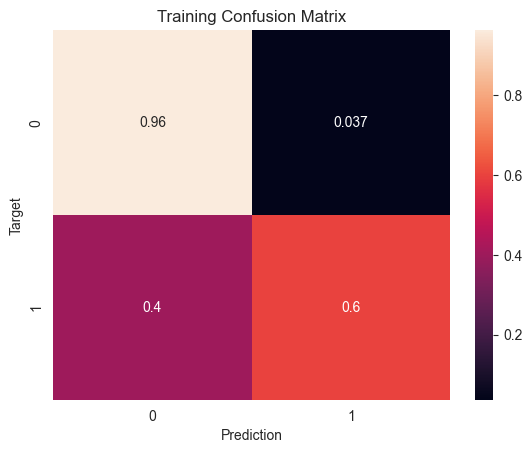

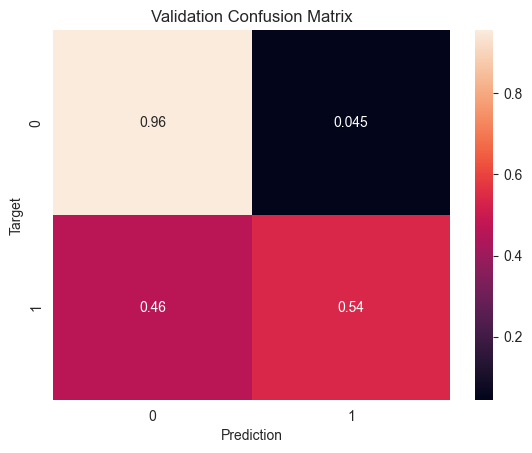

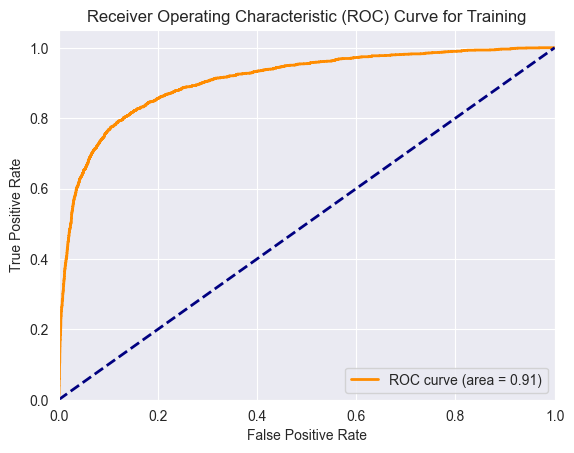

AUROC for Validation: 0.88


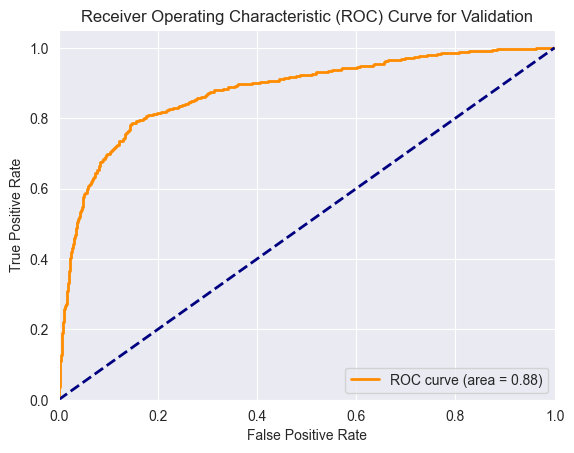

In [81]:
from sklearn.metrics import roc_curve, auc

# Helper function to predict, compute accuracy & plot confusion matrix
def predict_and_plot(inputs, targets, name=''):
    preds = model_pipeline.predict(inputs)
    f1 = f1_score(targets, preds)
    print("F1 score: {:.2f}%".format(f1 * 100))
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name))
    return preds

def compute_auroc_and_build_roc(inputs, targets, name=''):
  # Predict probabilities
  y_pred_proba = model_pipeline.predict_proba(inputs)[:, 1]

  # Compute ROC curve
  fpr, tpr, thresholds = roc_curve(targets, y_pred_proba)

  # Compute AUROC
  roc_auc = auc(fpr, tpr)
  print(f'AUROC for {name}: {roc_auc:.2f}')

  # Plot the ROC curve
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'Receiver Operating Characteristic (ROC) Curve for {name}')
  plt.legend(loc="lower right")
  plt.show()

# Evaluate on train and validation data
predict_and_plot(X_train, train_targets, 'Training')
predict_and_plot(X_val, y_val, 'Validation')

compute_auroc_and_build_roc(X_train, train_targets, 'Training')
compute_auroc_and_build_roc(X_val, val_targets, 'Validation')

**Висновки:**
1. Ми використали LogisticRegression модель для бінарної класифікації.
2. Вже застосували модель на тренувальних та валідаційних даних, підрахували ROC AUC, F1 Score та Accuracy для кожного набору даних.
3. Можна спробувати використати на LogisticRegression моделі параметр `class_weight='balanced'` для вирішення проблеми з несбалансованими класами в датасеті.
4. Модель має непогані результати на тренувальних даних, але на валідаційних даних результати трохи гірші.
5. Площа під ROC кривою для тренувальних даних дорівнює 0.91, а для валідаційних даних - 0.88. Це означає, що модель працює досить добре.
6. F1 Score для тренувальних даних дорівнює ~0.68, а для валідаційних даних - ~0.62. Це означає, що модель працює задовільно (майже однаково) на обох наборах даних. Ганна каже, що це доволі непогано, бо буває і гірше.

8. Створіть передбачення моделі, яка передбачає завжди мажоритарний клас (той, якого більше в тренувальних даних). Порахуйте Accuracy на тренувальних та валідаційних даних для цієї моделі і тої, що ми натренували в п.6. Зробіть заключення про якість нашої моделі: якість хороша, погана, задовільна?

In [82]:
# Calculate accuracy for majority class model
majority_class = train_targets.mode()[0]
print(f'Majority class: {majority_class}')

# Calculate accuracy for majority class model
train_majority_predictions = np.full_like(train_targets, majority_class)
val_majority_predictions = np.full_like(val_targets, majority_class)

train_majority_accuracy = accuracy_score(train_targets, train_majority_predictions)
val_majority_accuracy = accuracy_score(val_targets, val_majority_predictions)
print(f'Majority class model accuracy on training data: {train_majority_accuracy:.3f}')
print(f'Majority class model accuracy on validation data: {val_majority_accuracy:.3f}')

# Calculate accuracy for logistic regression model
train_accuracy = accuracy_score(train_targets, train_predictions)
val_accuracy = accuracy_score(val_targets, val_predictions)
print(f'Logistic regression model accuracy on training data: {train_accuracy:.3f}')
print(f'Logistic regression model accuracy on validation data: {val_accuracy:.3f}')

Majority class: 0.0
Majority class model accuracy on training data: 0.797
Majority class model accuracy on validation data: 0.796
Logistic regression model accuracy on training data: 0.890
Logistic regression model accuracy on validation data: 0.870


**Висновки:**
Ми порівняли результати моделі, яка передбачає завжди мажоритарний клас з моделлю, яку ми натренували в п.6. Бачимо, що наша модель, на ~10% краще, ніж якщо ми будемо передбачати мажоритарний клас (що, клієнт співпрацює із банком). Ми памʼятаємо, що у нас дані там як раз розбиті були так, що ~80% даних це ті, які ще співпрацюють із банком, а ~20% - покинули банк, тому бачимо, що і просто якщо будемо казати завжди, що вони ще співпрацюють, що і точність буде ~80%.

Явно наша модель круче, бо на 10% краще (0.89 vs 0.79) розпізнає клієнтів, які покинули банк.

9. Збережіть модель і інші обʼєкти, які ви хотіли б зберегти, з використанням бібліотеки joblib в файл `log_reg.joblib`. Потім завантажте модель з файлу в змінну `model_2` (цим ми тренуємось завантажувати модель з файлу на майбутнє).

In [83]:
# Save the model to disk
joblib_value = {
    'model': model_pipeline,
    'preprocessor': preprocessor,
    'input_cols': input_cols,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols
}
joblib.dump(joblib_value, 'saved_data/log_reg.joblib')

# Load the model from disk
model_2 = joblib.load('saved_data/log_reg.joblib')['model']

10. Ознайомтесь з роботою наведеної функції `predict_raw_df`. Ця функція робить підготовку даних (масштабування числових колонок і кодування категоріальних) і виводить ймовірності належності до класу 1 для кожного рядка в наданому наборі.

Доповніть або внесіть зміни у функцію з врахуванням вашого препроцесингу даних.

In [104]:
import warnings
warnings.filterwarnings("ignore")

def predict_raw_df(scaler, encoder, numeric_cols, encoded_cols, categorical_cols, input_df: pd.DataFrame):
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    X_input = input_df[numeric_cols + encoded_cols]
    prob = model.predict_proba(X_input)[:,1]
    return prob

In [105]:
# Test the function
scaler = model_pipeline.named_steps['preprocessor'].transformers_[0][1]
encoder = model_pipeline.named_steps['preprocessor'].transformers_[1][1]
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

predict_raw_df(scaler, encoder, numeric_cols, encoded_cols, categorical_cols, raw_df[:5])

array([0.00624889, 0.02372995, 0.65005552, 0.36730924, 0.98299757])

11. Зчитайте дані з `test.csv` в змінну `test_raw_df`. Зробіть передбачення для кожного рядка даних з функцією з попереднього завдання і запишіть результат в нову колонку `Exited` в датафреймі `test_raw_df`.

In [113]:
test_raw_df = pd.read_csv('bank-customer-churn-prediction-dlu/test.csv')

# Predict on test data
test_raw_df['Exited'] = predict_raw_df(scaler, encoder, numeric_cols, encoded_cols, categorical_cols, test_raw_df)
test_raw_df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,...,Surname_Zito,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Exited
0,15000,-0.582766,Chu,-1.035843,Germany,Male,-0.945213,-1.086973,1.722127,-1.105641,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.023090
1,15001,-0.291144,Mazzi,-1.494211,France,Male,0.162811,-0.006364,-0.719280,0.770093,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.044391
2,15002,0.154946,Onyekachi,0.658728,France,Male,0.655267,1.074245,-0.719280,0.770093,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.082164
3,15003,0.572685,Martin,0.811518,Spain,Male,0.901494,-0.726770,-0.719280,-1.105641,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.259539
4,15004,-0.168884,Kenechukwu,-0.924724,Spain,Male,0.655267,1.074245,-0.719280,0.770093,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.039395


12. Зчитайте файл 'sample_submission.csv' і зповніть колонку `Exited` передбаченими вашою моделлю значеннями для кожного відповідного `id` клієнта.
Виведіть перші 5 рядків фінального датасету, збережіть результат в файл `submission_log_reg.csv` (УВАГА! не запишіть випадково ще індекси рядків!) і здайте цей файл на Kaggle зі свого профіля натиснувши `Submit Prediction`.

In [109]:
# Read sample submission
sample_submission = pd.read_csv('bank-customer-churn-prediction-dlu/sample_submission.csv')

sample_submission.head(n=5)

,id,Exited
0,15000,0.5
1,15001,0.5
2,15002,0.5
3,15003,0.5
4,15004,0.5


In [116]:
# Fill 'Exited' column with predictions
sample_submission['Exited'] = test_raw_df['Exited']

# Save the submission
sample_submission.to_csv('saved_data/submission_log_reg.csv', index=False)
sample_submission.head(n=5)

,id,Exited
0,15000,0.023090
1,15001,0.044391
2,15002,0.082164
3,15003,0.259539
4,15004,0.039395
